In [3]:
import DSGRN
from DSGRN import *


import sys
sys.setrecursionlimit(10**8)
sys.path.insert(0,'/home/elizabeth/Desktop/GIT/dsgrn_acdc/src')

from PGDraw import *
from NsearchgoeQuery import *
from stats import *
from PhenotypeGraphviz import *
from PhenotypeHexcodeviz import *
from PhenotypeGraphFun import *
from PhenotypeGraphFun_Gradient import *
from CondensationGraph_iter import *
from save_files import *

In [8]:
database = Database("/home/elizabeth/Desktop/ACDC/ACDC_Fullconn.db") 
network = Network("/home/elizabeth/Desktop/ACDC/ACDC_Fullconn") 
parameter_graph = ParameterGraph(network)

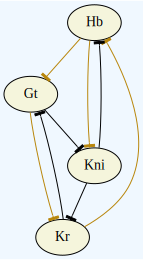

In [9]:
DrawGraph(network)

In [10]:
parameter_graph.size()

2560000

In [11]:
AP35 = {"Hb":[0,2], "Gt":2, "Kr":0, "Kni":0}
AP37 = {"Hb":2, "Gt":[0,2], "Kr":0, "Kni":0}
AP40 = {"Hb":2, "Gt":0, "Kr":[0,2], "Kni":0} 
AP45 = {"Hb":[0,2], "Gt":0, "Kr":2, "Kni":0}
AP51 = {"Hb":0, "Gt":0, "Kr":2, "Kni":[0,2]} 
AP57 = {"Hb":0, "Gt":0, "Kr":[0,2], "Kni":2}
AP63 = {"Hb":0, "Gt":[0,2], "Kr":0, "Kni":2} 
AP67 = {"Hb":0, "Gt":2, "Kr":0, "Kni":[0,2]}

D = [[AP35], [AP37], [AP40], [AP45], [AP51], [AP57], [AP63], [AP67]]
paramslist = get_paramslist_optimized(database, D, '=')

In [17]:
for i in paramslist:
    print((len(i)/2560000)*100)

4.390859375
4.0206640625
4.390859375
4.0206640625
4.390859375
4.0206640625
4.390859375
4.0206640625


In [51]:
main_edges = get_phenotype_graph_parallel(database, paramslist, 4)

In [6]:
main_edges = load_json('Fullconn_main_edges')

In [7]:
len(main_edges)

861340

In [52]:
save_json(main_edges, 'Fullconn_main_edges')

In [53]:
Full_list = {0: ['00'], 1:['40'], 2:['44','50','C0' ], 3: ['54','C4','D0'], 4: ['55','D4','CC','F0'], 5: ['D5','DC','F4'], 6: ['DD','F5','FC'], 7: ['FD'], 8:['FF']}

### What does the original condensation scc's look like?

In [258]:
cond_og, redu_params_og, scc_og =  condensation_graph_optimized(main_edges)

In [261]:
Paths_og = find_all_paths(cond_og, redu_params_og[0], redu_params_og[-1], 8, 100000 )

[(0, 120), (1, 6), (2, 6), (3, 2400), (4, 2400), (5, 48000), (6, 48000), (7, 120)]


In [327]:
Hb_data_og, Gt_data_og, Kr_data_og, Kni_data_og = Fullconn_get_data_scc(database, Paths_og, scc_og)

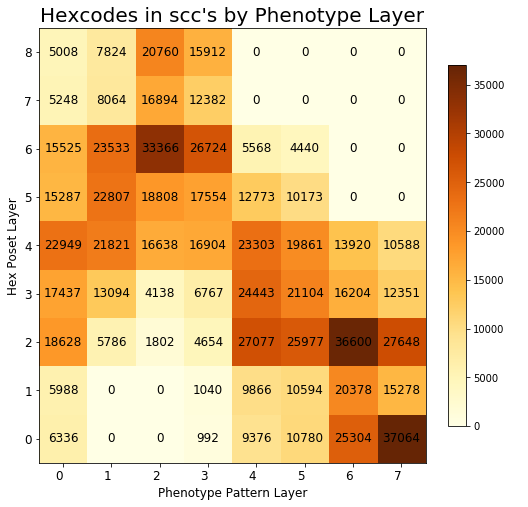

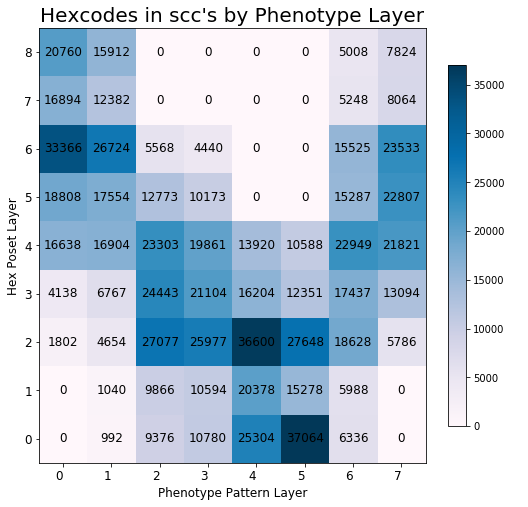

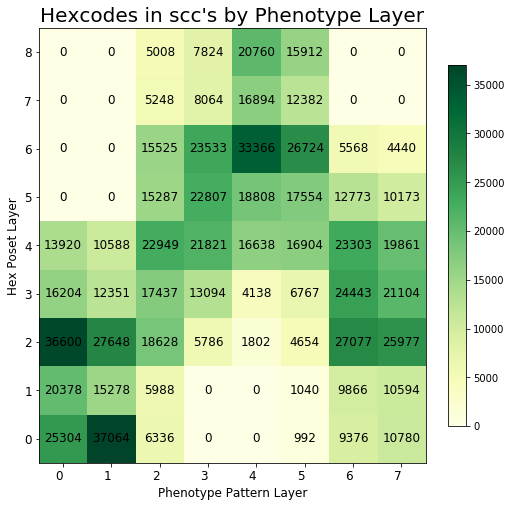

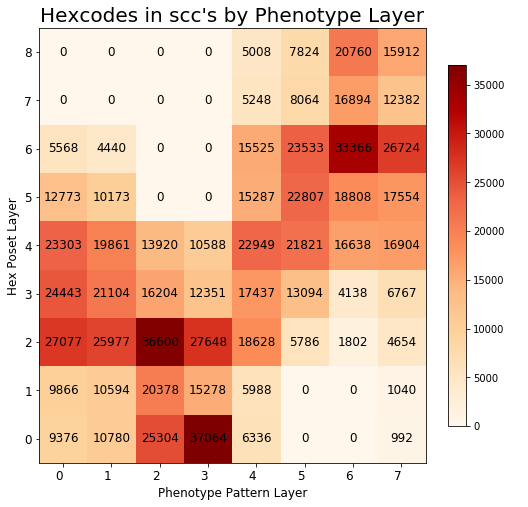

(None, None, None, None)

In [328]:
plot(Hb_data_og,Full_list, 20,12, "YlOrBr"), plot(Gt_data_og,Full_list,20,12, "PuBu"), plot(Kr_data_og,Full_list,20,12, "YlGn"), plot(Kni_data_og,Full_list,20,12, "OrRd")

### What happens to the paths scc's if we impose a gradient on Hb? 

In [54]:
Hb_gradient_edges = add_phenotype_Hb_gradient(database, main_edges, Full_list, Full_list)

In [58]:
cond, redu_params, scc =  condensation_graph_optimized(Hb_gradient_edges)

In [59]:
len(cond)

178

In [179]:
cond_Hb = load_json('cond_Hb_gradient_main_edges_f')

In [180]:
with open('redu_params_Hb_gradient_main_edges_f') as f:
    redu_params_Hb = json.load(f)

In [181]:
redu_params_Hb_new = []
for i in redu_params_Hb:
    n = [(m[0], m[1]) for m in i]
    redu_params_Hb_new.append(n)

In [182]:
scc_Hb = load_json_scc('scc_Hb_gradient_main_edges_f')

In [187]:
final_cond_dict_Hb, new_paramslist_Hb, del_list_Hb = cond_h2l_Hb_gradient(database, cond_Hb, redu_params_Hb_new)

Remember to change phenotype layer numb if needed


In [184]:
len(final_cond_dict_Hb)

137

In [185]:
count = 0
for i in final_cond_dict_Hb:
    count+= len(final_cond_dict_Hb[i])
print(count)

482


### Find all paths of lenth 9 with only Hb gradient imposed

In [277]:
Paths_Hb = find_all_paths(final_cond_dict_Hb, new_paramslist_Hb[0], new_paramslist_Hb[-1], 8, 100000 )

[(0, 299), (1, 18), (1, 16), (2, 15), (3, 2410), (4, 2407), (5, 48406), (6, 48001), (7, 120)]
[(0, 299), (1, 18), (1, 16), (2, 15), (3, 2410), (4, 2407), (5, 48406), (6, 208401), (7, 120)]
[(0, 299), (1, 18), (1, 17), (2, 15), (3, 2410), (4, 2407), (5, 48406), (6, 48001), (7, 120)]
[(0, 299), (1, 18), (1, 17), (2, 15), (3, 2410), (4, 2407), (5, 48406), (6, 208401), (7, 120)]
[(0, 299), (1, 18), (1, 17), (2, 160015), (3, 162410), (4, 162407), (5, 48406), (6, 48001), (7, 120)]
[(0, 299), (1, 18), (1, 17), (2, 160015), (3, 162410), (4, 162407), (5, 48406), (6, 208401), (7, 120)]
[(0, 299), (1, 18), (2, 16), (2, 15), (3, 2410), (4, 2407), (5, 48406), (6, 48001), (7, 120)]
[(0, 299), (1, 18), (2, 16), (2, 15), (3, 2410), (4, 2407), (5, 48406), (6, 208401), (7, 120)]
[(0, 299), (1, 18), (2, 16), (3, 2411), (3, 2410), (4, 2407), (5, 48406), (6, 48001), (7, 120)]
[(0, 299), (1, 18), (2, 16), (3, 2411), (3, 2410), (4, 2407), (5, 48406), (6, 208401), (7, 120)]
[(0, 299), (1, 18), (2, 16), (3, 24

In [278]:
len(Paths_Hb)

96

In [326]:
Hb_data_Hb, Gt_data_Hb, Kr_data_Hb, Kni_data_Hb = Fullconn_get_data_scc(database, Paths_Hb, scc_Hb)

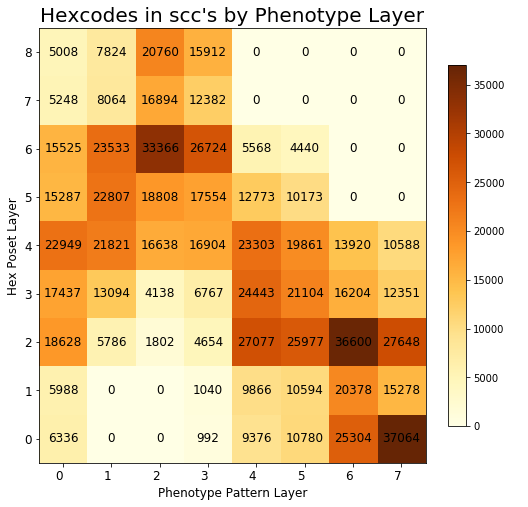

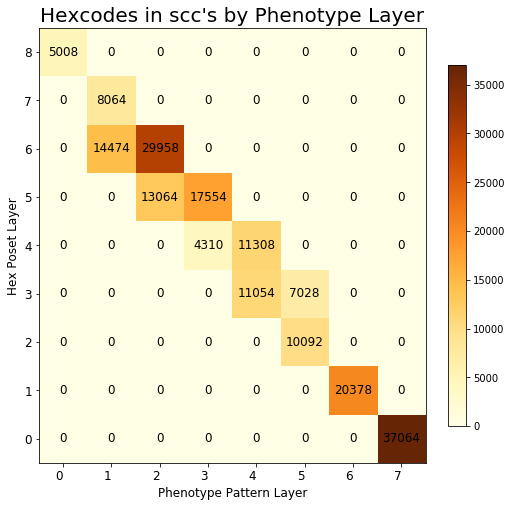

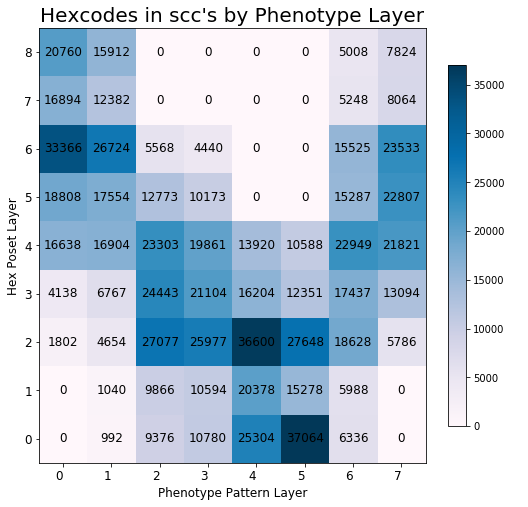

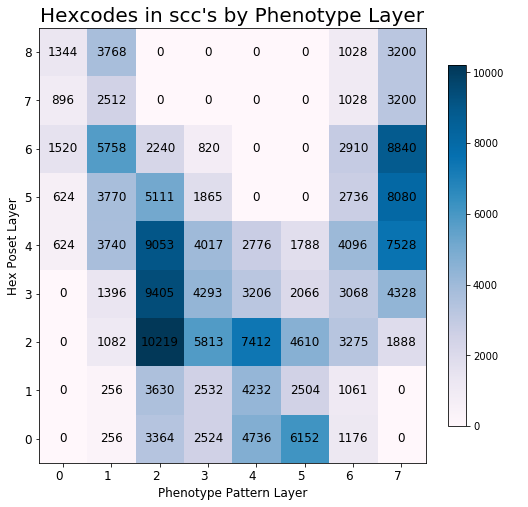

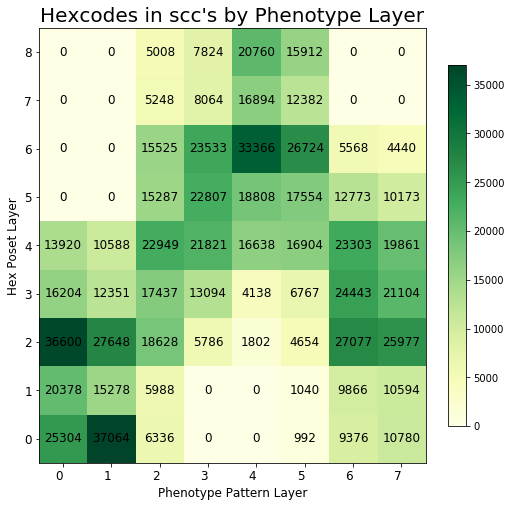

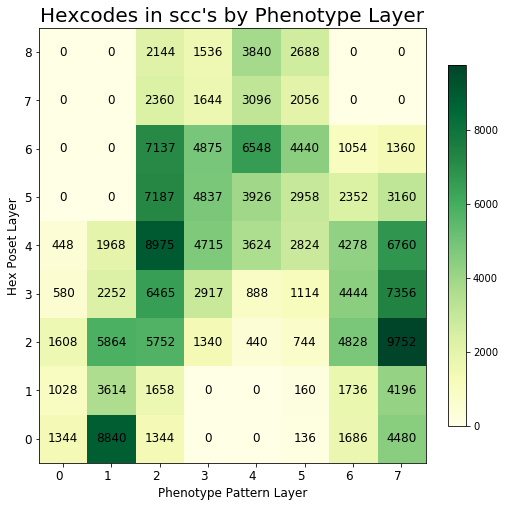

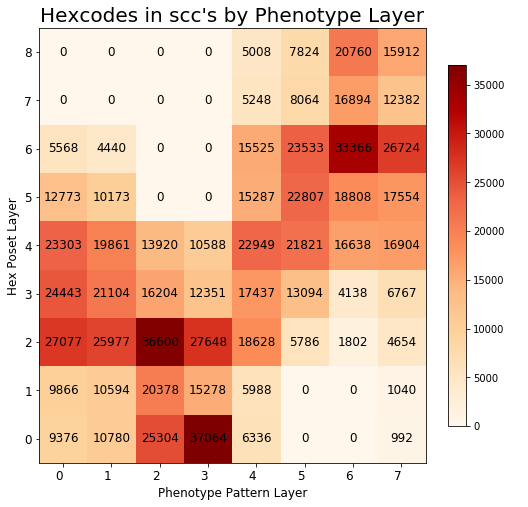

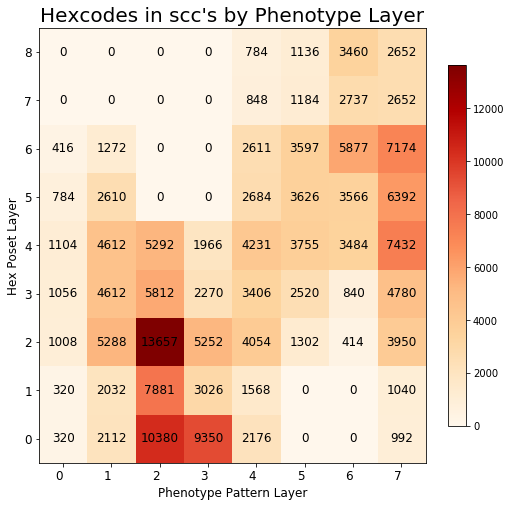

In [329]:
plot(Hb_data_og,Full_list, 20,12, "YlOrBr"),
plot(Hb_data_Hb,Full_list, 20,12, "YlOrBr"), 

plot(Gt_data_og,Full_list,20,12, "PuBu"),
plot(Gt_data_Hb,Full_list,20,12, "PuBu"), 

plot(Kr_data_og,Full_list,20,12, "YlGn"), 
plot(Kr_data_Hb,Full_list,20,12, "YlGn"), 

plot(Kni_data_og,Full_list,20,12, "OrRd")
plot(Kni_data_Hb,Full_list,20,12, "OrRd")

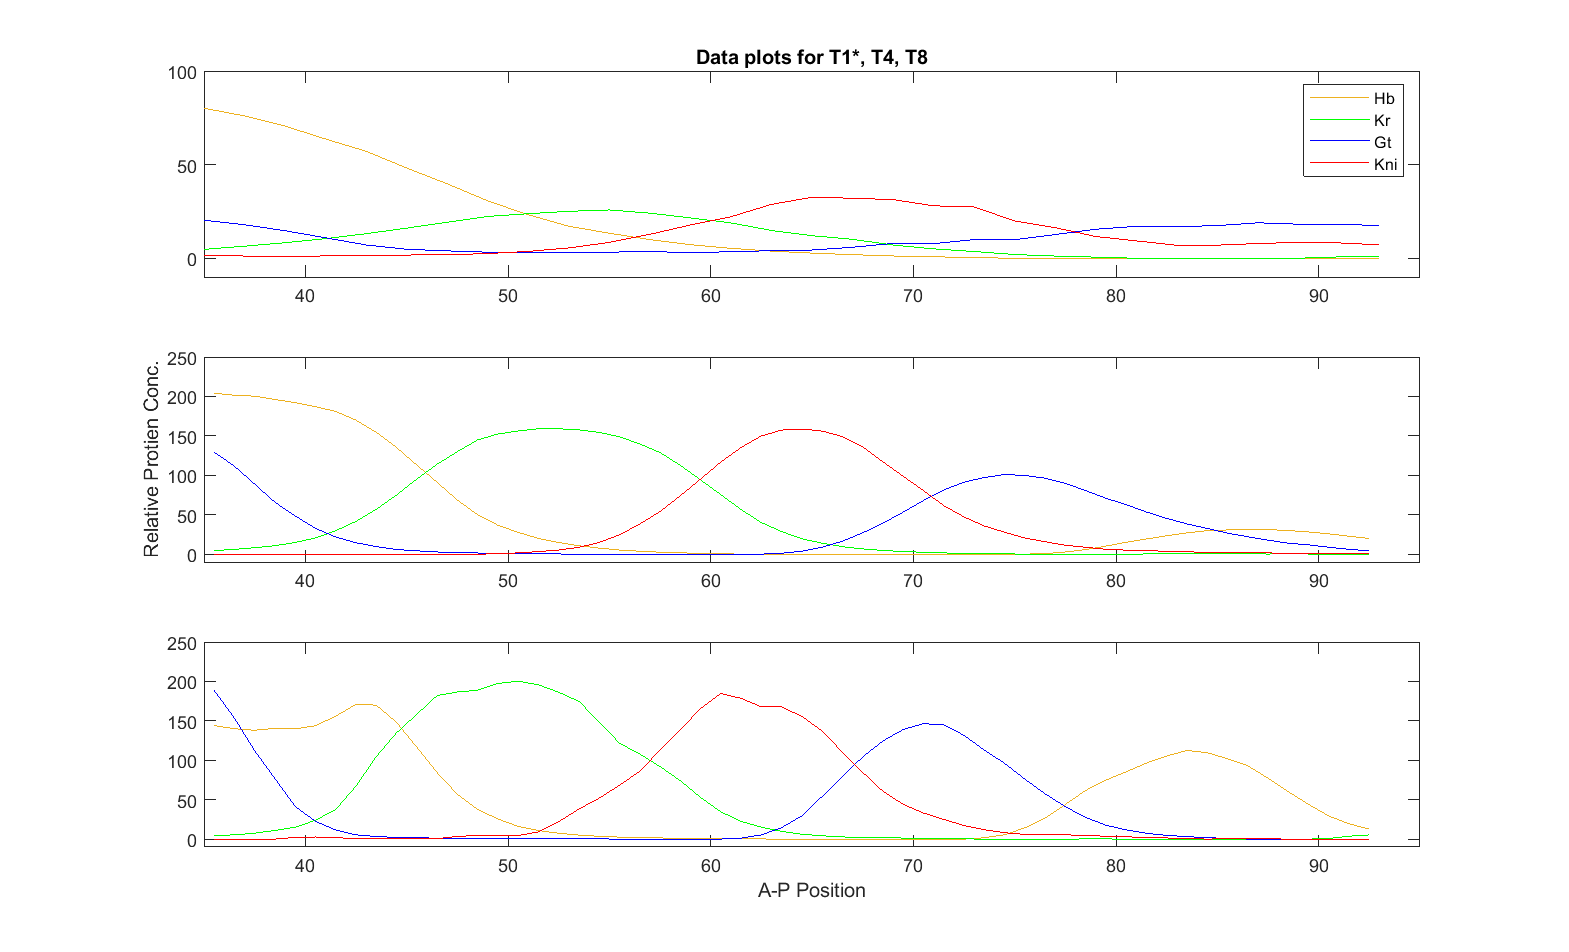

## Kni Gradient

In [88]:
Kni_gradient_edges = add_phenotype_Kni_gradient(database, main_edges, Full_list, Full_list)

In [89]:
cond_Kni, redu_params_Kni, scc_Kni =  condensation_graph_optimized(Kni_gradient_edges)

In [466]:
save_json(cond_Kni, 'cond_Kni_gradient_main_edges_f')

In [467]:
with open('redu_params_Kni_gradient_main_edges_f', 'w') as f:
    json.dump(redu_params, f)

In [468]:
with open('scc_Kni_gradient_main_edges_f', 'w') as f:
    json.dump(scc, f)

In [144]:
final_cond_dict_Kni, new_paramslist_Kni, del_list_Kni = cond_h2l_Kni_gradient(database, cond_Kni, redu_params_Kni)

Remember to change phenotype layer numb if needed


In [145]:
len(final_cond_dict_Kni)

123

In [146]:
count = 0
for i in final_cond_dict_Kni:
    count+= len(final_cond_dict_Kni[i])
print(count)

407


### Find all paths of lenth 11 with only Kni gradient imposed

In [147]:
Paths_Kni = find_all_paths(final_cond_dict_Kni, new_paramslist_Kni[0], new_paramslist_Kni[-1], 10, 10000 )

[(0, 120), (1, 1288006), (2, 1296006), (3, 1298414), (4, 1299200), (4, 1339200), (4, 67200), (4, 99200), (5, 104000), (6, 144000), (7, 152120)]
[(0, 120), (1, 1288006), (2, 1296006), (3, 1298414), (4, 1299200), (4, 1339200), (4, 67200), (4, 99200), (5, 136000), (6, 144000), (7, 152120)]
[(0, 120), (1, 1288006), (2, 1296006), (3, 1298414), (4, 1299200), (4, 1339200), (4, 67200), (4, 99200), (5, 136000), (6, 1424000), (7, 152120)]
[(0, 120), (1, 1288006), (2, 1296006), (3, 1298414), (4, 1299200), (4, 1339200), (4, 67200), (4, 1379200), (5, 136000), (6, 144000), (7, 152120)]
[(0, 120), (1, 1288006), (2, 1296006), (3, 1298414), (4, 1299200), (4, 1339200), (4, 67200), (4, 1379200), (5, 136000), (6, 1424000), (7, 152120)]
[(0, 120), (1, 1288006), (2, 1296006), (3, 1298414), (4, 1299200), (4, 1339200), (4, 67200), (4, 1379200), (5, 1384000), (6, 1424000), (7, 152120)]
[(0, 120), (1, 1288006), (2, 1296006), (3, 1298414), (4, 1299200), (4, 1339200), (4, 67200), (5, 96000), (5, 104000), (6, 1440

In [148]:
len(Paths_Kni)

582

### What hexcodes are in the strongly connected componet group associated to the representative node?

In [325]:
Hb_data_Kni, Gt_data_Kni, Kr_data_Kni, Kni_data_Kni = Fullconn_get_data_scc(database, Paths_Kni, scc_Kni)

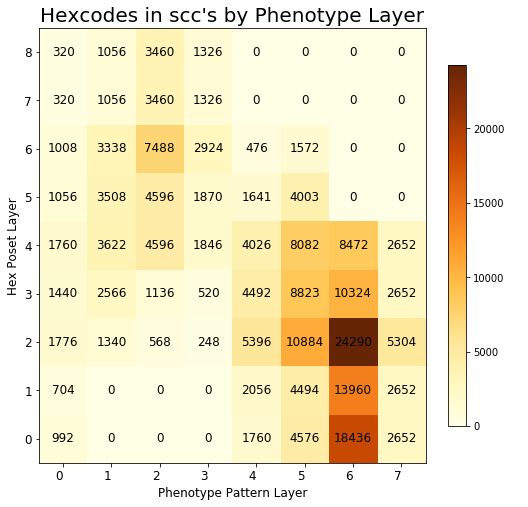

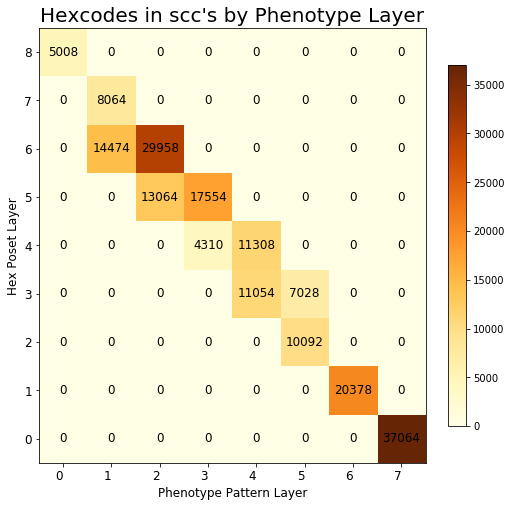

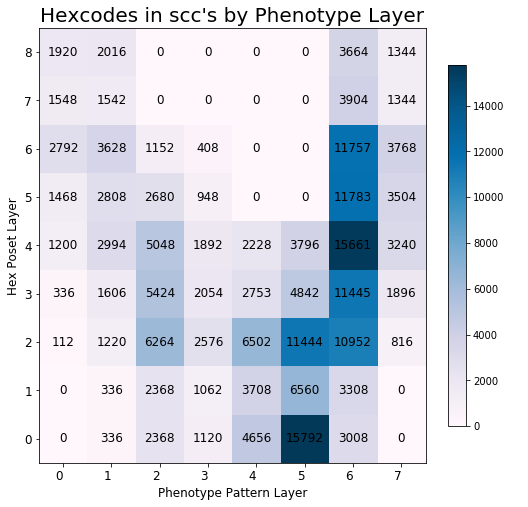

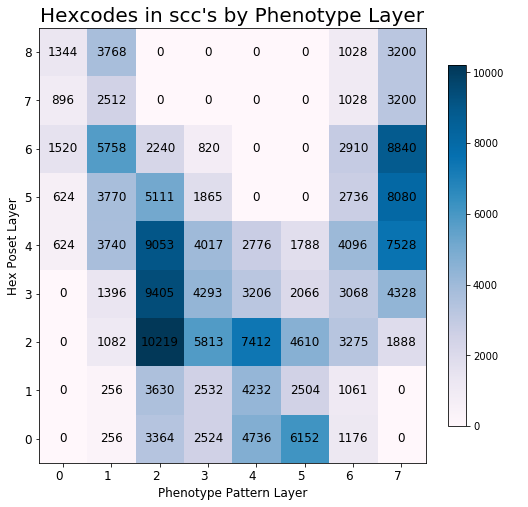

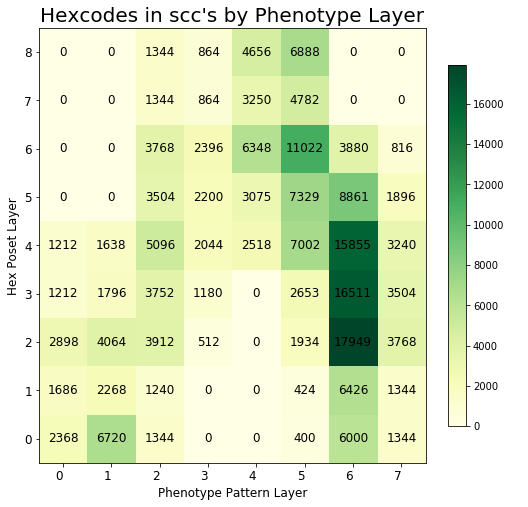

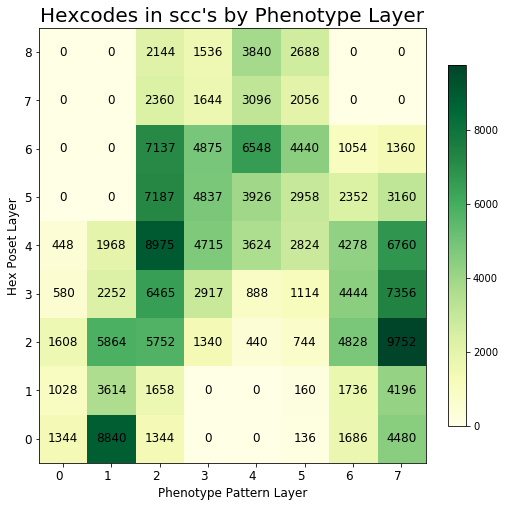

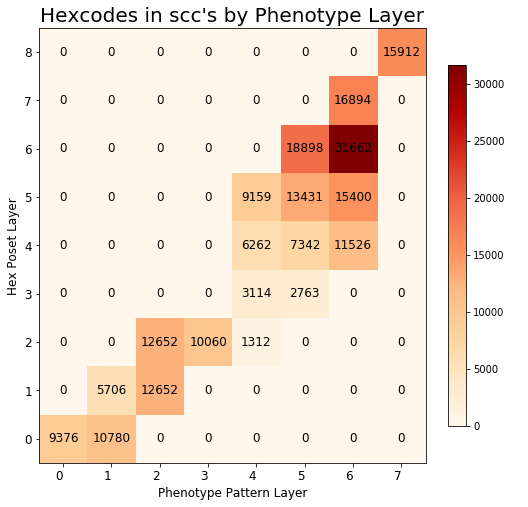

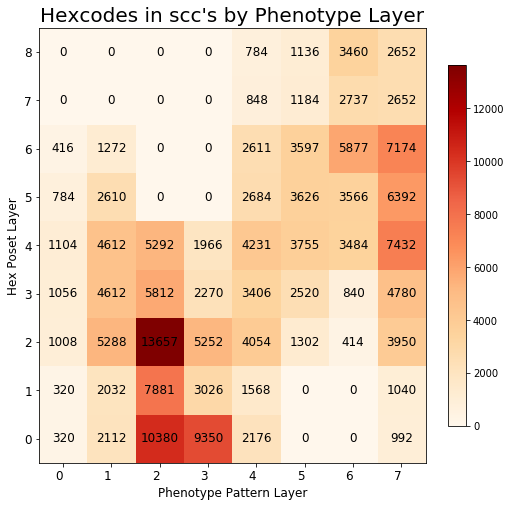

In [330]:
plot(Hb_data_Kni,Full_list, 20,12, "YlOrBr"),
plot(Hb_data_Hb,Full_list, 20,12, "YlOrBr"), 

plot(Gt_data_Kni,Full_list,20,12, "PuBu"),
plot(Gt_data_Hb,Full_list,20,12, "PuBu"), 

plot(Kr_data_Kni,Full_list,20,12, "YlGn"), 
plot(Kr_data_Hb,Full_list,20,12, "YlGn"), 

plot(Kni_data_Kni,Full_list,20,12, "OrRd")
plot(Kni_data_Hb,Full_list,20,12, "OrRd")

### Hb Gradient with Boundry Condition for Kni

In [224]:
%%time
Hb_Knibc_edges = add_phenotype_Hb_Knibc_gradient(database, main_edges, Full_list, Full_list)

CPU times: user 9h 30min 2s, sys: 21.1 s, total: 9h 30min 23s
Wall time: 9h 30min 21s


In [225]:
cond_Hb_Knibc, redu_params_Hb_Knibc, scc_Hb_Knibc =  condensation_graph_optimized(Hb_Knibc_edges)

In [226]:
save_json(cond_Hb_Knibc, 'cond_Hb_gradient_Hb_Knibc_f')

In [227]:
with open('redu_params_Hb_gradient_Hb_Knibc_f', 'w') as f:
    json.dump(redu_params_Hb_Knibc, f)

In [228]:
with open('scc_Hb_gradient_Hb_Knibc_f', 'w') as f:
    json.dump(scc_Hb_Knibc, f)

In [229]:
final_cond_Hb_Knibc, new_paramslist_Hb_Knibc, del_list_Hb_Knibc = cond_h2l_Hb_gradient(database, cond_Hb_Knibc, redu_params_Hb_Knibc)

Remember to change phenotype layer numb if needed


In [230]:
len(final_cond_Hb_Knibc)

137

In [231]:
count = 0
for i in final_cond_Hb_Knibc:
    count+= len(final_cond_Hb_Knibc[i])
print(count)

482


In [232]:
Paths_Hb_Knibc = find_all_paths(final_cond_Hb_Knibc, new_paramslist_Hb_Knibc[0], new_paramslist_Hb_Knibc[-1], 8, 100000 )

[(0, 299), (1, 18), (1, 16), (2, 15), (3, 2410), (4, 2407), (5, 48406), (6, 48001), (7, 120)]
[(0, 299), (1, 18), (1, 16), (2, 15), (3, 2410), (4, 2407), (5, 48406), (6, 208401), (7, 120)]
[(0, 299), (1, 18), (1, 17), (2, 15), (3, 2410), (4, 2407), (5, 48406), (6, 48001), (7, 120)]
[(0, 299), (1, 18), (1, 17), (2, 15), (3, 2410), (4, 2407), (5, 48406), (6, 208401), (7, 120)]
[(0, 299), (1, 18), (1, 17), (2, 160015), (3, 162410), (4, 162407), (5, 48406), (6, 48001), (7, 120)]
[(0, 299), (1, 18), (1, 17), (2, 160015), (3, 162410), (4, 162407), (5, 48406), (6, 208401), (7, 120)]
[(0, 299), (1, 18), (2, 16), (2, 15), (3, 2410), (4, 2407), (5, 48406), (6, 48001), (7, 120)]
[(0, 299), (1, 18), (2, 16), (2, 15), (3, 2410), (4, 2407), (5, 48406), (6, 208401), (7, 120)]
[(0, 299), (1, 18), (2, 16), (3, 2411), (3, 2410), (4, 2407), (5, 48406), (6, 48001), (7, 120)]
[(0, 299), (1, 18), (2, 16), (3, 2411), (3, 2410), (4, 2407), (5, 48406), (6, 208401), (7, 120)]
[(0, 299), (1, 18), (2, 16), (3, 24

In [284]:
Paths_Hb == Paths_Hb_Knibc

True

In [322]:
Hb_data_Hb_Knibc, Gt_data_Hb_Knibc, Kr_data_Hb_Knibc, Kni_data_Hb_Knibc = Fullconn_get_data_scc(database, Paths_Hb_Knibc, scc_Hb_Knibc)

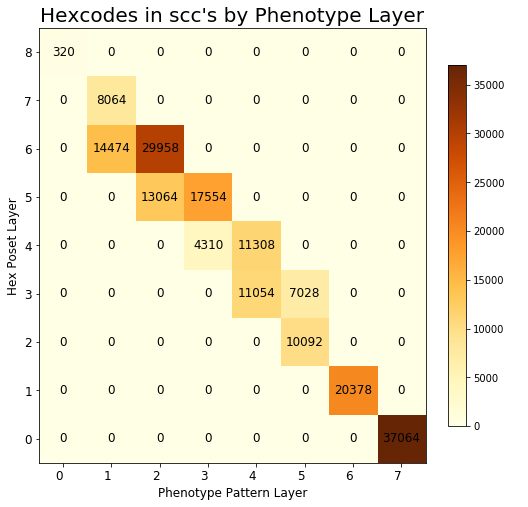

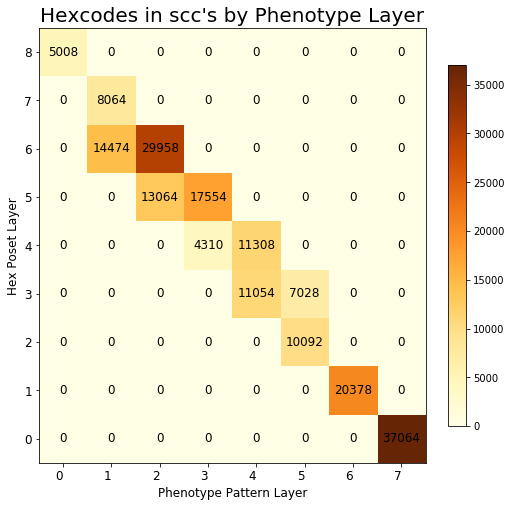

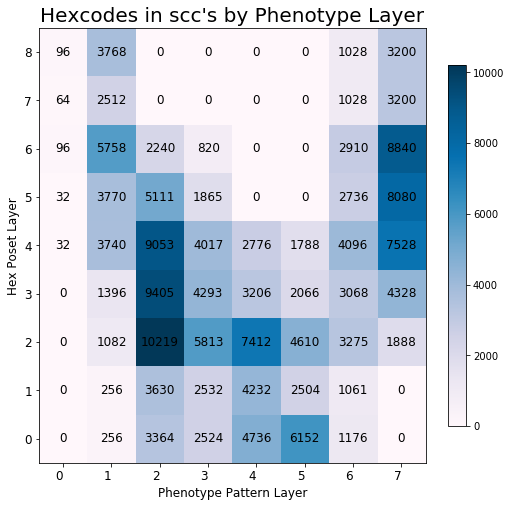

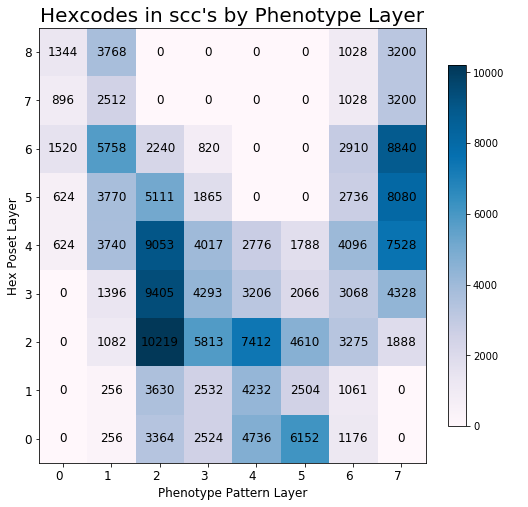

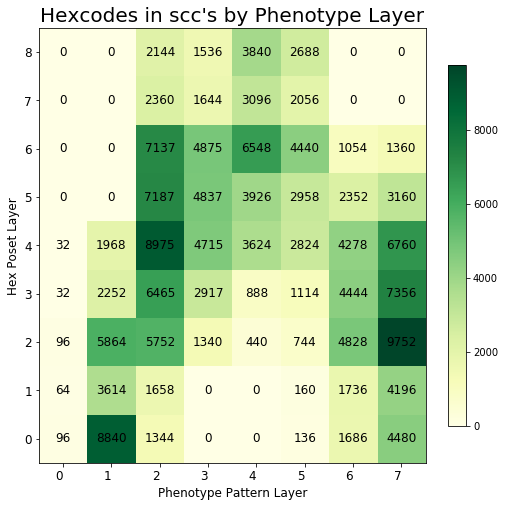

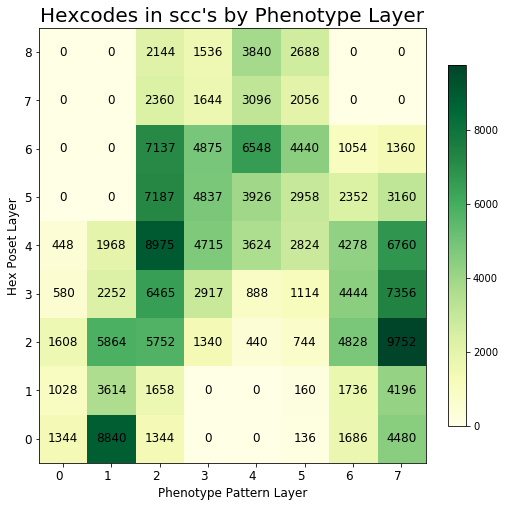

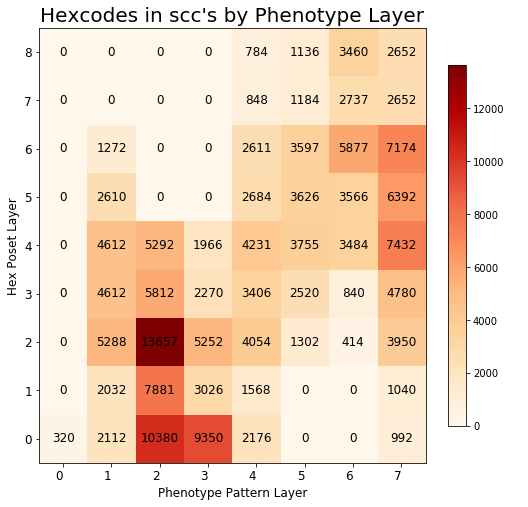

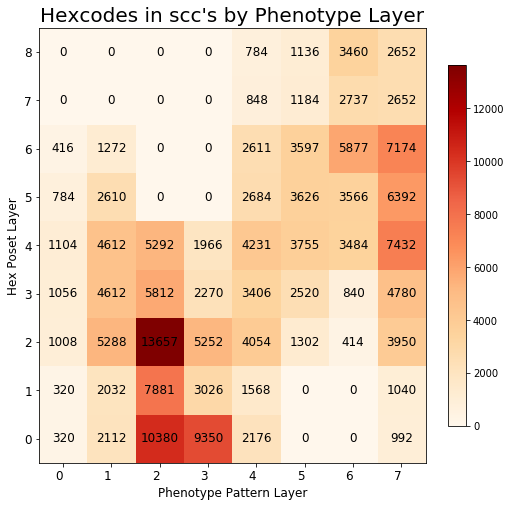

In [331]:
plot(Hb_data_Hb_Knibc,Full_list, 20,12, "YlOrBr"),
plot(Hb_data_Hb,Full_list, 20,12, "YlOrBr"), 

plot(Gt_data_Hb_Knibc,Full_list,20,12, "PuBu"),
plot(Gt_data_Hb,Full_list,20,12, "PuBu"), 

plot(Kr_data_Hb_Knibc,Full_list,20,12, "YlGn"), 
plot(Kr_data_Hb,Full_list,20,12, "YlGn"), 

plot(Kni_data_Hb_Knibc,Full_list,20,12, "OrRd")
plot(Kni_data_Hb,Full_list,20,12, "OrRd")

### How many paths follow the data using the represenative node?

In [429]:
want_dict = {'Gt': [['F0'],  ['00'],  ['00'],  ['00'],  ['00'],  ['00'],  ['00'],  ['C0']], 
            'Kr': [['00'], ['00'], ['00'], ['C0'], ['C0'], ['40'], ['40'], ['00']  ], 
            'Kni': [['00'], ['00'], ['00'], ['00'], ['00'], ['C0'], ['C0'], ['44']  ]}

In [430]:
want_dict

{'Gt': [['F0'], ['00'], ['00'], ['00'], ['00'], ['00'], ['00'], ['C0']],
 'Kr': [['00'], ['00'], ['00'], ['C0'], ['C0'], ['40'], ['40'], ['00']],
 'Kni': [['00'], ['00'], ['00'], ['00'], ['00'], ['C0'], ['C0'], ['44']]}

In [431]:
pg = DSGRN.ParameterGraph(database.network)
count = 0
new_paths = []
for path in Paths:
    for node in path:
        params = pg.parameter(node[-1])
        logic = params.logic()
        if ((logic[1]).stringify())[6:-2] in want_dict['Gt'][node[0]] and ((logic[2]).stringify())[6:-2] in want_dict['Kr'][node[0]] and ((logic[3]).stringify())[6:-2] in want_dict['Kni'][node[0]]:
            #print(node, 'GOOD')
            if node[0] == 7:
                count += 1
                new_paths.append(path)
            else:
                continue
        else: 
            #print(' ')
            break
     
    
print(count, len(Paths), str(round((count/len(Paths))*100, 2))+'%')

40 146 27.4%
